In [1]:
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

In [36]:
step=2000
turn=100
lenght=200
radious=100
magic=turn/lenght
dl=np.linspace(0,turn,step)
vertex=np.c_[np.cos(2*np.pi*dl)*radious,np.sin(2*np.pi*dl)*radious,((dl-turn/2)/magic)]

#####   BOTTOM COILS ######
coilbottom1 = magpy.current.Line(
    current=100,
    vertices=vertex,
    position=(0,0,0)   
)
cob2Pos=(-250,0,0)
coilbottom2 = magpy.current.Line(
    current=100,
    position=cob2Pos,
    vertices=vertex+cob2Pos
)
cob3Pos=(250,0,0)
coilbottom3 = magpy.current.Line(
    current=100,
    position=cob3Pos,
    vertices=vertex+cob3Pos
)

###### TOP COILS ######
cot1Pos=(0,0,lenght+50)
coiltop1 = magpy.current.Line(
    current=100,
    position=cot1Pos,
    vertices=vertex+cot1Pos
)
cot2Pos=(250,0,lenght+50)
coiltop2 = magpy.current.Line(
    current=100,
    position=cot2Pos,
    vertices=vertex+cot2Pos
)
cot3Pos=(-250,0,lenght+50)
coiltop3 = magpy.current.Line(
    current=100,
    position=cot3Pos,
    vertices=vertex+cot3Pos
)
bottomCoils=[coilbottom1,coilbottom2,coilbottom3]
topCoils=[coiltop1,coiltop2,coiltop3]

magpy.show(coilbottom1,coilbottom2,coilbottom3,coiltop1,coiltop2,coiltop3,backend='plotly')


In [27]:
print(coiltop1.vertices[1:])

[[ 9.51007940e+01  3.09166457e+01  1.50100050e+02]
 [ 8.08832204e+01  5.88039511e+01  1.50200100e+02]
 [ 5.87403756e+01  8.09294030e+01  1.50300150e+02]
 ...
 [ 8.08832204e+01 -5.88039511e+01  3.49799900e+02]
 [ 9.51007940e+01 -3.09166457e+01  3.49899950e+02]
 [ 1.00000000e+02  3.92877345e-13  3.50000000e+02]]


In [39]:
print(np.shape(coiltop1.vertices)[0])
print(coilbottom1.vertices)

print(coilbottom1.getB([100,0,150]))

2000
[[ 1.00000000e+02  0.00000000e+00 -1.00000000e+02]
 [ 9.51007940e+01  3.09166457e+01 -9.98999500e+01]
 [ 8.08832204e+01  5.88039511e+01 -9.97998999e+01]
 ...
 [ 8.08832204e+01 -5.88039511e+01  9.97998999e+01]
 [ 9.51007940e+01 -3.09166457e+01  9.98999500e+01]
 [ 1.00000000e+02  3.92877345e-13  1.00000000e+02]]
[ 8.11047617 -0.02493445  6.82195169]


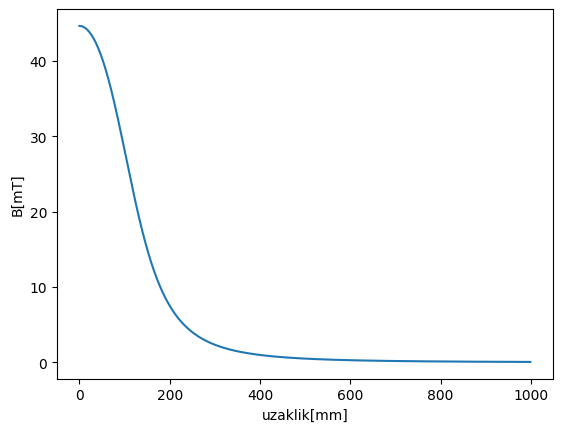

In [43]:

x=np.linspace(0,1000,1000)
yol=np.c_[0*x,0*x,x]
manyetikalan = coilbottom1.getB(yol)
plt.plot(range(0,len(manyetikalan[:,2])),manyetikalan[:,2])
plt.xlabel("uzaklik[mm]")
plt.ylabel("B[mT]")
plt.show()


In [31]:
print(b_on_c2)

plt.plot(range(0,len(b_on_c2[:,2])),b_on_c2[:,2])
plt.show()

[[ 0.58779016  0.01488505 -0.30693237]
 [ 0.60363677  0.06922626 -0.30967145]
 [ 0.65639606  0.13262271 -0.31952818]
 ...
 [ 0.40397142 -0.06710356  0.14668365]
 [ 0.38993515 -0.03026531  0.12870505]
 [ 0.38476867  0.00465525  0.12327689]]


In [37]:
def find_mag_field(coilbot,coiltop):
    return coilbot.getB(coiltop.vertices)    

def find_force(B,coil):
    fTotal=0
    for idx in range(2,np.shape(coil.vertices)[0]-1):
        fTotal+=coil.current*np.cross( (coil.vertices[idx+1]-coil.vertices[idx])/1000 , B[idx]/1000)
    return fTotal


totalForce=0

for bottomcoil in bottomCoils:
    
    for topcoil in topCoils:
        totalForce += find_force(find_mag_field(bottomcoil,topcoil),topcoil)
        
print(totalForce)
        
    


[ -0.05245924   0.07058435 -10.87100822]


In [17]:
fTotal=0
for idx in range(2,lenght-1):
    fTotal+=100*np.cross( (coil2.vertices[idx+1]-coil2.vertices[idx])/1000 , b_on_c2[idx]/1000)
print(fTotal)    

2000
[ -0.06556038   0.07288096 -38.60335076]


B hesaplamca denemeleri

In [21]:
k=1e-7
#some big number
step=20000
#turn
turn=1000
lenght=0.2
magic=turn/lenght
dl=np.linspace(0,turn,step)
loop=np.c_[np.cos(2*np.pi*dl)*0.1,np.sin(2*np.pi*dl)*0.1,((dl-turn/2)/magic)]
where=np.c_[np.cos(2*np.pi*dl)*0.1,np.sin(2*np.pi*dl)*0.1,((dl-turn/2)/magic)+0.5]

# 1 turn version
# dl=np.linspace(0,1,1000)
# loop=np.c_[np.cos(2*np.pi*dl)*0.1,np.sin(2*np.pi*dl)*0.1,dl*0]
# where=np.c_[np.cos(2*np.pi*dl)*0.1,np.sin(2*np.pi*dl)*0.1,dl*0+0.1]
# dl=np.linspace(0,1,1000)
# loop=np.c_[np.cos(2*np.pi*dl)*1,np.sin(2*np.pi*dl)*1,dl*0]
# where=np.c_[np.cos(2*np.pi*dl)*1,np.sin(2*np.pi*dl)*1,dl*0+1]

#some big number
# step=2000
# #turn
# turn=100
# lenght=0.2
# magic=turn/lenght
# dl=np.linspace(0,turn,step)
# loop=np.c_[np.cos(2*np.pi*dl)*0.2,np.sin(2*np.pi*dl)*0.2,((dl-turn/2)/magic)]
# where=np.c_[np.cos(2*np.pi*dl)*0.2,np.sin(2*np.pi*dl)*0.2,((dl-turn/2)/magic)+0.2]

B=[]

for idy in range(len(where)):
    temp=0
    for idx in range(0,len(loop)-1):  
        temp+=k*(np.cross( loop[idx+1]-loop[idx]  , where[idy]-loop[idx]  )) / (np.linalg.norm(where[idy]-loop[idx] )**3)
    B.append(temp)
B=np.array(B)

In [7]:
F=0
for idx in range(0,len(where)-1):
    F+=(np.cross( where[idx+1]-where[idx]  , B[idx]))
print(F)

[ 5.67164836e-09  8.06717387e-08 -9.90310330e-07]


In [34]:
#F = (3*mu*m1*m2*(m1 x m2))/d**4
#m = N*I*A
# mu= 4π × 10−7
mu=4*np.pi*1e-7
N=10000
I=100
r=0.1
A=np.pi*(r**2)

d=0.5

print(Fu)

0.031415926535897934
[0, 0, 31415.926535897936]
[0, 0, -31415.926535897936]
[-0.  0.  0.]
[-0.  0.  0.]
